##  Plotly asymmetric diverging colorscales adapted to data ##

###  Symmetric diverging colorscales ###

Diverging colorscales are recommendend for visualizing data that are symmetric with respect to a reference value, that is the data range is approximately [reference-val, reference+val], where val>0. Such colormaps emphasize the positive and negative deviations from the reference point.

A simplest diverging colormap is defined by two isoiluminant end hues, left color and right color, and  a mid color that has a higher luminance than the end  colors.
The normalized reference point is mapped to the central color of the colorscale defined by these three colors.



Details about  Plotly color scales can be found [here](https://plot.ly/python/heatmaps-contours-and-2dhistograms-tutorial/),
and [here](http://nbviewer.ipython.org/gist/jackparmer/4696226c9b6b931bbdf6).

We illustrate below how we can define a custom diverging matplotlib colormap, respectively a Plotly colorscale, starting with a list of three colors (left, mid and right color).


In [2]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [29]:
def display_cmap(cmap): #Display  a colormap cmap
    plt.imshow(np.linspace(0, 100, 256)[None, :],  aspect=25, interpolation='nearest', cmap=cmap) 
    plt.axis('off')

In [30]:
def colormap_to_colorscale(cmap):
    #function that transforms a matplotlib colormap to a Plotly colorscale
    return [ [k*0.1, colors.rgb2hex(cmap(k*0.1))] for k in range(11)]
    

In [31]:
def colorscale_from_list(alist, name): 
    # Defines a colormap, and the corresponding Plotly colorscale from the list alist
    # alist=the list of basic colors
    # name is the name of the corresponding matplotlib colormap
    
    cmap = LinearSegmentedColormap.from_list(name, alist)
    display_cmap(cmap)
    colorscale=colormap_to_colorscale(cmap)
    return cmap, colorscale

Let us define a diverging colorscale from a list of three colors. The left color is green, the right is brown and the mid color is  a low saturated yellow:

In [32]:
elevation =['#32924c',  '#d7df84', '#91511e']  

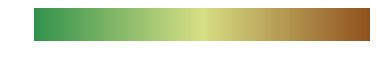

In [33]:
elev_cmap, elev_cs = colorscale_from_list(elevation, 'elev_cmap') 

The  `elev_cs` colorscale,  appropriate for elevation data, is explicitly defined by the following list of lists:

In [34]:
elev_cs=[[0.0, '#32924c'],
 [0.1, '#52a157'],
 [0.2, '#74b162'],
 [0.3, '#94c06d'],
 [0.4, '#b6d079'],
 [0.5, '#d7de84'],
 [0.6, '#c9c370'],
 [0.7, '#bba65b'],
 [0.8, '#ad8a47'],
 [0.9, '#9f6d32'],
 [1.0, '#91511e']]

Mount Bruno plotted with this colorscale:

<div>
    <a href="https://plot.ly/~empet/3754/" target="_blank" title="Mount-Bruno" style="display: block; text-align: center;"><img src="https://plot.ly/~empet/3754.png" alt="Mount-Bruno" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="empet:3754"  src="https://plot.ly/embed.js" async></script>
</div>


From a list of red, low saturated white-yellow and green color we define a diverging colormap and  colorscale, that are appropriate for visualizing financial data (see for example [here](http://www.barchart.com/stocks/heatmap.php)).

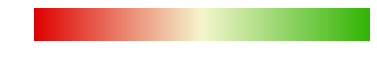

In [35]:
redgreen=['#df0101', '#f5f6ce','#31b404']
fin_cmap, fin_cs = colorscale_from_list(redgreen, 'fin_cmap') 

The resulted financial-type colorscale is represented by the following list:

In [36]:
fin_cs=[[0.0, u'#df0101'],
 [0.1, u'#e33129'],
 [0.2, u'#e86353'],
 [0.3, u'#ec937b'],
 [0.4, u'#f1c5a5'],
 [0.5, u'#f4f6cd'],
 [0.6, u'#cee9a6'],
 [0.7, u'#a6db7c'],
 [0.8, u'#7fce55'],
 [0.9, u'#57c12c'],
 [1.0, u'#31b404']]

[Seaborn](http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html) provides a function for defining custom diverging matplotlib colormaps,  that can be transformed in Plotly colorscales:

In [37]:
import seaborn as sns
sns.set(style="white")

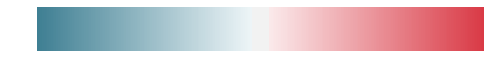

In [38]:
sns_cmap = sns.diverging_palette(220, 10, as_cmap=True)
display_cmap(sns_cmap)

The corresponding Plotly colorscale:

In [39]:
sns_cs=colormap_to_colorscale(sns_cmap)
sns_cs  

[[0.0, u'#3f7f93'],
 [0.1, u'#6397a7'],
 [0.2, u'#88b1bd'],
 [0.30000000000000004, u'#acc9d2'],
 [0.4, u'#d1e2e7'],
 [0.5, u'#f2f2f2'],
 [0.6000000000000001, u'#f6cdd0'],
 [0.7000000000000001, u'#efa8ad'],
 [0.8, u'#e8848b'],
 [0.9, u'#e15e68'],
 [1.0, u'#da3b46']]

### Asymmetric diverging colorscales adapted to data ###

There are data sets that are asymmetric with respect to a reference value, and it is also of interest to visualize them with a diverging color scale, in order to point out to what extent they exceed the reference value, respectively are under this value.

For example we could be interested in the temperature recorded in an area, each month over many years, that exceeds or is below to  32 Fahrenheit degrees (or 0 Celsius degree). 

The above defined `elev_cs` (elevation) colorscale 
is destinated for plotting surfaces or contour plots of geographic terrain elevation.
A mountain can be green up to some height (reference point) and above it  it is brown (no vegetation there).

Symmetric diverging colormaps and colorscales are not appropriate for visualizing such data because they map the mid value of the data range to the color with highest luminance or in this case we are interested in mapping the reference point to that color.

In the following we give a method to associate an  asymmetric diverging colorscale  to an asymmetric data range with respect to a reference point.
Such a colorscale has the maximum luminance at the normalized reference point, and the  luminance is decreasing with the same speed toward ends, as in the images inserted in the next cells:

In [40]:
from IPython.display import Image

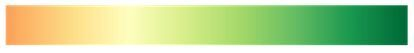

In [41]:
Image(filename='Data/sym_colorsc1.jpg')

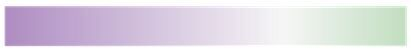

In [42]:
Image(filename='Data/asym_colorsc2.jpg')

Given data of range [`dmin`, `dmax`], the reference point `refp`, with `dmin`<`refp`<`dmax`,
and a symmetric diverging matplotlib colormap, `div_cmap`, we define an asymmetric diverging colorscale adapted to this data set.

We discuss the case `refp`-`dmin` < `dmax`-`refp`. The opposite case can be easily deduced from this one.  

Theoretically, the values in the symmetric interval [refp-(dmax-refp), dmax] are normalized and mapped to colors in the chosen symmetric diverging colormap,
`div_cmap`.
Then we clip this colormap keeping the colors corresponding to normalized values of the interval [`dmin`, `dmax`].

We explain the practical procedure referring to the image below:

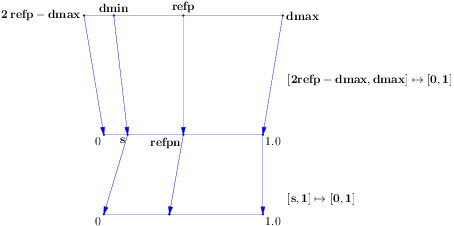

In [43]:
Image(filename='Data/asymdiv.png')

`s` is the normalized value of dmin, and `repn` of the reference point `refp`.

Starting from `repn` we divide the interval (s, refpn], respectively (refpn, 1.0), by equally spaced points, with the step size set by default to 0.05. Finally we add the ends, s and 1.0, to the resulted grid. Denote by $T[j]$ a point in this grid. 

These grid points are  normalized by the linear map
$[s, 1]\mapsto [0,1]$. 

If T_norm[j]$\in[0,1]$  are their normalized values, then we define a colorscale from the list of lists

[T_norm[j], `div_cmap`(T[j])], j=0, $\cdots$.

These ideas are implemented below:

In [54]:
def normalize(x,a,b): #maps  the interval [a,b]  to [0,1]
    if a>b:
        raise ValueError('(a,b) is not an interval')
    return float(x-a)/(b-a)

In [55]:
def asymmetric_colorscale(data,  div_cmap, ref_point=0.0, step=0.05):
    #data: data can be a DataFrame, list of equal length lists, np.array, np.ma.array
    #div_cmap is the symmetric diverging matplotlib or custom colormap
    #ref_point:  reference point
    #step:  is step size for t in [0,1] to evaluate the colormap at t
   
    if isinstance(data, pd.DataFrame):
        D = data.values
    elif isinstance(data, np.ma.core.MaskedArray):
        D=np.ma.copy(data)
    else:    
        D=np.asarray(data, dtype=np.float) 
    
    dmin=np.nanmin(D)
    dmax=np.nanmax(D)
    if not (dmin < ref_point < dmax):
        raise ValueError('data are not appropriate for a diverging colormap')
        
    if dmax+dmin > 2.0*ref_point:
        left=2*ref_point-dmax
        right=dmax
        
        s=normalize(dmin, left,right)
        refp_norm=normalize(ref_point, left, right)# normalize reference point
        
        T=np.arange(refp_norm, s, -step).tolist()+[s]
        T=T[::-1]+np.arange(refp_norm+step, 1, step).tolist()
        
        
    else: 
        left=dmin
        right=2*ref_point-dmin
        
        s=normalize(dmax, left,right) 
        refp_norm=normalize(ref_point, left, right)
        
        T=np.arange(refp_norm, 0, -step).tolist()+[0]
        T=T[::-1]+np.arange(refp_norm+step, s, step).tolist()+[s]
        
    L=len(T)
    T_norm=[normalize(T[k],T[0],T[-1]) for k in range(L)] #normalize T values  
    return [[T_norm[k], colors.rgb2hex(div_cmap(T[k]))] for k in range(L)]
    

###  Examples ###

a) A heatmap  associated  to data related to Exchange Traded Funds (ETFs)

Read data from an Excel file:

In [3]:
xl = pd.ExcelFile("Data/ETF-Data.xls")
df = xl.parse("Sheet1")
df.head()

,Country/ETF-Ticker,Aug-09,Sept-09,Change
0,"Australia, EWA",-0.65%,-0.18%,0.47%
1,"Austria, EWO",1.99%,0.99%,-1.00%
2,"Belgium, EWK",0.76%,0.13%,-0.63%
3,"Brazil, EWZ",1.58%,1.22%,-0.36%
4,"Canada, EWC",0.88%,-0.36%,-1.23%


- Define a new Dataframe from  the last three columns of  df, remove the character '%', and convert strings to float:

In [57]:
df1=df[[ u'Aug-09', u'Sept-09', u' Change']]
tab=df1.values.tolist()
tab=np.array([[float(s.replace('%','')) for s in item] for item in tab])

Our data are asymmetric with respect to $0$, because the min and max values are as follows:

In [48]:
print np.min(tab), np.max(tab)

-22.05 4.57


- Define an asymmetric diverging colorscale associated to our data, with the reference point 0, and the symmetric diverging matplotlib colormap, `fin_cmap`, defined above:

In [49]:
fin_asymm_cs= asymmetric_colorscale(tab,  fin_cmap, ref_point=0.0, step=0.05)

- Plot the data (tab)  Heatmap with the new defined colorscale:

In [58]:
import plotly.plotly as py  
from plotly.graph_objs import *

In [59]:
X=['Aug-09', 'Sept-09', 'Change']
Y=list(df[u'Country/ETF-Ticker'])

In [60]:
trace =Heatmap(
        z=tab,
        x=X, 
        y=Y,
        colorscale=fin_asymm_cs,     
        )

width = 400
height =900

layout = Layout(
    title='ETFs Data', 
    font=Font(
        family='Balto, sans-serif',
        size=12,
        color='rgb(68,68,68)'
    ),
    showlegend=False,
    xaxis=XAxis(
        title='',  
        showgrid=True,
        side='top',
        tickangle=45
    ),
    yaxis=YAxis(
        title='',
        autorange='reversed',
        showgrid=True,   
        autotick=False,  
        dtick=1          
    ),
    autosize=False, 
    height=height,   
    width=width,
    margin=Margin(
        l=135,
        r=40,
        b=85,
        t=170
    )
)
   


fig=Figure(data=Data([trace]), layout=layout)        

annotations = Annotations()
alist=list(tab)
for i, row in enumerate(alist):
    for j, val in enumerate(row):
        annotations.append(
            Annotation(
                text=str(val)+'%', 
                x=X[j], y=Y[i],
                xref='x1', yref='y1',
                font=dict(color= 'rgb(25,25,25)'),
                showarrow=False))
fig['layout'].update(annotations=annotations)  
py.sign_in('empet', 'my_api_key')
py.iplot(fig, filename='Exchange-Traded-Funds')

b) The Heatmap of a data set consisting in  Boston monthly average temperature over many years.  The reference point is 32 Fahrenheit degrees, and the starting symmetric diverging colormap is the `sns_cmap`  (https://plot.ly/~empet/3348/):

<div>
    <a href="https://plot.ly/~empet/3348/" target="_blank" title="Average Temperature in Boston, Month by Year 1872-2002 &lt;br&gt; A heatmap plotted with an asymmetric diverging colorscale" style="display: block; text-align: center;"><img src="https://plot.ly/~empet/3348.png" alt="Average Temperature in Boston, Month by Year 1872-2002 &lt;br&gt; A heatmap plotted with an asymmetric diverging colorscale" style="max-width: 100%;width: 1080px;"  width="1080" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="empet:3348"  src="https://plot.ly/embed.js" async></script>
</div>


c) The heatmap of a lower triangular submatrix of a correlation matrix of entries in an asymmetric subinterval in [-1,1],
with respect to the reference point $0$  (https://plot.ly/~empet/3265/):

<div>
    <a href="https://plot.ly/~empet/3265/" target="_blank" title="Correlation Matrix with Asymmetric Diverging Colorscale" style="display: block; text-align: center;"><img src="https://plot.ly/~empet/3265.png" alt="Correlation Matrix with Asymmetric Diverging Colorscale" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="empet:3265"  src="https://plot.ly/embed.js" async></script>
</div>


In [1]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()